# Question 1

A counting measure is a measure (applicable to sets of discrete elements) that inputs a set and returns its cardinality, i.e. the number of elements it holds.

In [1]:
# Defining the counting measure as a function
# inputting set S & outputting its length

# NOTE: In this implementation, S may be
# any data structure representing a collection of elements
# (list, tuple, set, etc.)
def countingMeasure(S):
  # Using a try-except block to ensure S is a collection data type
  try:
    return len(S)
  except:
    return "Invalid data type"

In [2]:
# Testing the function
#------------------------
# Valid case:
print("Counting measure for set {1, 2, 3}:", countingMeasure({1, 2, 3}))
# Invalid case:
print("Counting measure for integer 3:", countingMeasure(3))

Counting measure for set {1, 2, 3}: 3
Counting measure for integer 3: Invalid data type


Additivity is the property of a measure $M$ wherein if we have two disjoint sets $A$ and $B$, then:<br> $M(A \bigcup B)=M(A)+M(B)$

In [3]:
# Defining two disjoint sets A & B
A, B = {'a', 'b', 'c'}, {'d', 'e', 'f'}
print("With M as the counting measure, we have...")
print("M(A union B) =", countingMeasure(A.union(B)))
print("M(A) + M(B) =", countingMeasure(A) + countingMeasure(B))

With M as the counting measure, we have...
M(A union B) = 6
M(A) + M(B) = 6


Hence, we see that the counting measure satisfies additivity.

# Question 2

A length measure for an interval (a continuous range of points) is a measure that inputs an interval and returns its length (i.e. upper bound minus lower bound).

In [4]:
# Defining a class to input intervals

# NOTE: In this implementation, we will not make
# the distinction between closed & open intervals
class Interval:
  def __init__(self, lb, ub): # lb = lower bound, ub = upper bound
    # If the lower bound exceeds the upper bound, it is an invalid interval
    if lb > ub:
      return None
    self.lb = lb
    self.ub = ub

In [5]:
# Defining the length measure as a function
# inputting an interval I & outputting the difference between its bounds
def lengthMeasure(I):
  # Using a try-except block to ensure S is an object of the "Interval" class
  try:
    return I.ub - I.lb
  except:
    return "Invalid interval"

In [6]:
# Testing the function
#------------------------
# Valid case:
print("Length measure for interval [1, 3]:", lengthMeasure(Interval(1, 3)))
# Invalid case 1 (invalid interval instantiation):
print("Length measure for interval [3, 1]:", lengthMeasure(Interval(3, 1)))
# Invalid case 2 (invalid argument type):
print("Length measure for integer 3:", lengthMeasure(3))

Length measure for interval [1, 3]: 2
Length measure for interval [3, 1]: Invalid interval
Length measure for integer 3: Invalid interval


Now to apply the test case $[1, 3.5]$...

In [7]:
print("Length measure for interval [1, 7]:", lengthMeasure(Interval(1, 3.5)))

Length measure for interval [1, 7]: 2.5


# Question 3

The exponential distribution function is defined as: <br>$f(x)=exp(-x)=e^{-x}$

The parameter $\lambda$ (lambda) is a commonly used rate parameter for the exponential distribution, such that: <br>$f(x)=\lambda e^{-\lambda x}$

This exponential distribution function is encoded in the `scipy.stats.expon` class. Having instantiated this class, the probability density function (PDF) and the cumulative distribution function (CDF) can be computed for a point or a collection of points by passing this point or collection of points as an argument to the respective class methods `.pdf` and `.cdf`.

**NOTE ON THE PARAMETER** $\lambda$:<br>According to the documentation of the `scipy.stats.expon` class (link: <a>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html</a>), this parameter is encoded in the `scale` attribute of the `scipy.stats.expon` class, wherein `scale` = $\frac{1}{\lambda}$. Thus, to put $\lambda = 2$ (as asked in question 3), we must set the `scale` attribute as $1/2$ during class instantiation.

**NOTE ON THE CALCULATION OF PROBABILITY MASS FOR AN INTERVAL**:<br>To calculate the probability mass of an interval $[a,b]$, we calculate<br>$CDF(b)-CDF(a)$

In [8]:
# Importing the required module
import scipy.stats as stats

In [9]:
# Instantiating a distribution with lambda = 2 (i.e. scale = 1/2)
f = stats.expon(scale=1/2)
# We could instantiate the above in the function,
# but this is more efficient here

# Defining the probability mass calculation function for intervals
def expon_measure(I):
  # Calculating the probability mass of the interval I
  # (We are using a try-except block to ensure the data type is correct)
  try:
    return f.cdf(I.ub) - f.cdf(I.lb)
  except:
    return "Invalid interval"

Computing for the test cases...

In [10]:
print("Probability mass of [0, 1] =", expon_measure(Interval(0, 1)))
print("Probability mass of [1, 1] =", expon_measure(Interval(1, 1)))
print("Probability mass of [1, 10] =", expon_measure(Interval(1, 10)))
print("Probability mass of (0, infinity) =",
      expon_measure(Interval(0, float("inf"))))
# NOTE: Probability mass of the entire distribution = 1

Probability mass of [0, 1] = 0.8646647167633873
Probability mass of [1, 1] = 0.0
Probability mass of [1, 10] = 0.13533528117545912
Probability mass of (0, infinity) = 1.0


Plotting the exponential distribution PDF with $\lambda=2$ (this distribution shall be denoted as Exp(2), as given in question 3)...

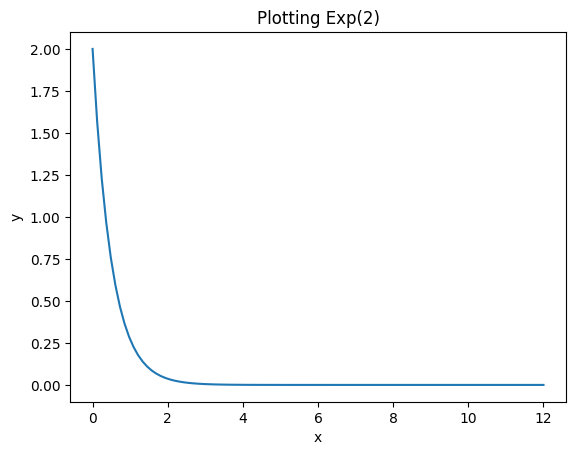

In [11]:
# For plotting functionalities:
from matplotlib.pyplot import plot, title, xlabel, ylabel, show
# To give as a large set of points in the domain space:
from numpy import linspace
x = linspace(0, 12, 100)
y = f.pdf(x)
title("Plotting Exp(2)")
plot(x, y)
xlabel("x")
ylabel("y")
show()

**OBSERVATIONS**:<br>Here, we can visually grasp that the area under the curve for the interval $[0,1]$ on the x-axis is much larger than the area under the curve for the interval $[1, 10]$. Secondly, the interval $[1, 1]$ is essentially a single point $x=1$, and the probability mass of any single point in a continuous distribution is zero. Lastly, the support of the exponential distribution (as can be seen to some extent in the graph) is $[0,\infty)$, which means the probability mass of the interval $[0,\infty)$ is the probability mass of the whole distribution, which has to be 1. Thus, all the results make sense.

# Question 4

In [12]:
# Instantiating a distribution with lambda = 2 (i.e. scale = 1/2)
f = stats.expon(scale=1/2)
# We could instantiate it in the function,
# but this is more efficient here

# Defining the probability density calculation function
def expon_pdf(x):
  # Calculating the probability density of point x
  # (We are using a try-except block to ensure the data type is correct)
  try:
    return f.pdf(x)
  except:
    return "Non-numerical input(s)"

In [13]:
# Importing the required function to do integration
from scipy.integrate import quad
# Importing the constant numpy.inf to represent infinity
from numpy import inf


**NOTE ON REPRESENTING INFINITY IN INTEGRATION BOUNDS**:<br>he requirement for `numpy.inf` for denoting infinity (negative or positive) in the upper or lower bounds of integration is mentioned in the documentation of scipy.integrate.quad, link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html.

**NOTE ON THE RETURN VALUE OF** `scipy.integrate.quad`:<br>At its basic usage (which we shall deal with), function `quad` returns a tuple containing two values: (1) the definite integral of the given function for the given bounds, and (2) the estimate of the absolute (i.e. unsigned) error, i.e. the estimate of the difference between the computed integral and its actual value.

Computing the given integrals...

In [14]:
# The dictionary relating the question to the desired integration bounds
IB = {
    "a": [0, 1],
    "b": [1, 1],
    "c": [1, 10],
    "d": [0, inf]}
# Looping through the desired integration bounds & printing the results
for ib in IB:
  result = quad(expon_pdf, IB[ib][0], IB[ib][1])
  print(f"({ib}):\nComputed integral = {result[0]}")
  print(f"Estimated error = {result[1]}")

(a):
Computed integral = 0.8646647167633872
Estimated error = 9.59970677131702e-15
(b):
Computed integral = 0.0
Estimated error = 0.0
(c):
Computed integral = 0.13533528117545912
Estimated error = 2.4502060294750603e-09
(d):
Computed integral = 0.9999999999999999
Estimated error = 1.547006406148436e-10


We have looped through the results in the above manner to conveniently present both aspects of the result of the `quad` function: the computed integral and the estimated error for this computation. This helps us acknowledge possible discrepancies between what we evaluate mathematically (ex. using the CDF function) and what we get through brute computation, allowing us to compare these results with those of question 3 more insightfully.

**OBSERVATIONS**:<br>Thus, we observe that the computer integrals here are practically equal to the probability measures obtained using the CDF in question 3 (*accounting for small computational errors due to the computational limits of precision*). The reason of this is the following...<br><br>The CDF defined at any point $x$ on the domain is essentially the integral of the PDF within the bounds $(-\infty,x]$. Hence, the difference between the CDF values of two points on the domain, say $x_1$ and $x_2$, is essentially the integral of the PDF within the bounds $[x_1, x_2]$. For this reason, we see practically the same results for questions 3 and 4 for the given intervals and for the given exponential distribution (with the rate parameter $\lambda = 2$).<br><br>***To rephrase in terms of probability mass***...<br>We have that the CDF of a point $x$ gives the probability mass of the part of the distribution at and below $x$, while the integral of the PDF within the bounds $[x_1, x_2]$ gives the probability mass of the part of the distribution between $x_1$ and $x_2$. Hence, the difference between the CDF values of two points on the domain, say $x_1$ and $x_2$, is the difference between the probability masses of the parts of the distribution at and below $x_1$ and $x_2$ respectively, which is in fact the probablity mass of the part of the distribution between $x_1$ and $x_2$. For this reason, we see practically the same results for questions 3 and 4 for the given intervals and for the given exponential distribution (with the rate parameter $\lambda = 2$).